# Real would image classification

This scipts classifies a real world images using a pretrained network called VGG16. First load a nececcary modules. Here we use the high-level neural networks API which works on top of tensorflow.

In [14]:
#import keras
import tensorflow.keras as keras # (use this line istead if you don't have keras but do have Tensorflow v1.10+ installed)
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Set a symbolic link to where the parameters are stored. 

OBS! If you run on your own computer, DO NOT execute the following cell.

In [15]:
#import subprocess
#output = subprocess.call(['./sym_link.sh'])
#print(output)

Load the network and all its pretrained parameters and print a summary of the network architecture. It will first donwload the weights if they have not yet been donwloaded (0.5 GB).

In [16]:
# load the model
model = keras.applications.vgg16.VGG16()
print(model.summary())

553467904/553467096 [==============================] - ETA:  - 177s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________

Import an image stored locally on your computer that you want to classify

In [32]:
# Uncomment these lines if you run via Google Colaboratory
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
fn = 'teddy.jpeg'

Do the preprocessing and prediction of the image

In [33]:
# load an image from file
image = load_img(fn, target_size=(224, 224))
# convert the image pixels to a numpy array
image_array = img_to_array(image)
# reshape data for the model
image_reshape = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
# prepare the image for the VGG model
image_preprocess = keras.applications.vgg16.preprocess_input(image_reshape)
# predict the probability across all output classes
yhat = model.predict(image_preprocess)
# convert the probabilities to class labels
label = keras.applications.vgg16.decode_predictions(yhat)

Plot the image and present the most likely labels

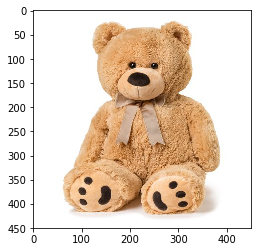

teddy (99.69%)
toyshop (0.15%)
wool (0.07%)
hamper (0.02%)
bonnet (0.01%)


In [34]:
# plot the image
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(fn)
plt.imshow(img)
plt.show()

# print the classification
for i in range(0,len(label[0])):
    print('%s (%.2f%%)' % (label[0][i][1], label[0][i][2]*100))